                        Bezirk Fallzahl (kumulativ)  Differenz (Vortag)  \
0   Charlottenburg-Wilmersdorf              115.230                 7.0   
1     Friedrichshain-Kreuzberg              124.359                11.0   
2                  Lichtenberg              114.959                 3.0   
3          Marzahn-Hellersdorf              104.562                 6.0   
4                        Mitte              163.178                20.0   
5                     Neukölln              129.682                 5.0   
6                       Pankow              168.100                10.0   
7                Reinickendorf               96.752                 8.0   
8                      Spandau               95.973                21.0   
9          Steglitz-Zehlendorf              109.443                 8.0   
10        Tempelhof-Schöneberg              134.126                11.0   
11            Treptow-Köpenick              104.496                 8.0   
12                      B

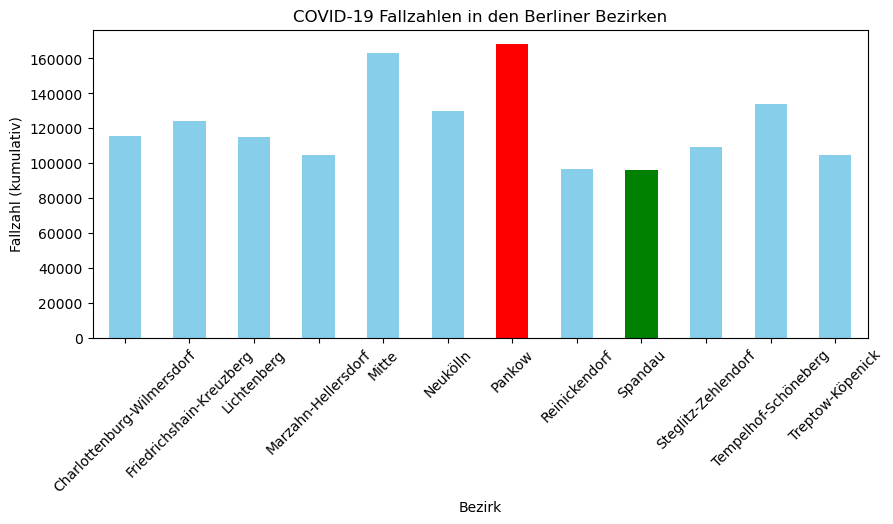

In [35]:
#Web scraping wo die meisten und wenigsten corona fälle waren balken diagram
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import matplotlib.pyplot as plt

# URL der Seite mit der Tabelle
url = "https://www.berlin.de/lageso/gesundheit/infektionskrankheiten/corona/tabelle-bezirke/"

# Tabelle scrapen und in einen DataFrame umwandeln
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table")
df = pd.read_html(StringIO(str(table)))[0] #In dataframe umwandeln
print(df)
# Daten bereinigen
df.dropna(how='all', inplace=True)  # Entferne leere Zeilen
df.dropna(axis=1, how='all', inplace=True)  # Entferne leere Spalten
df = df[df['Bezirk'] != 'Berlin']  # Berlin entfernen weil sonst das als meiste angezeigt wird 
df['Fallzahl (kumulativ)'] = df['Fallzahl (kumulativ)'].str.replace('.', '').astype(int)  # in int umwandeln
df.set_index('Bezirk', inplace=True)  # Setze den Index auf die Bezirksnamen

# Höchsten und niedrigsten Wert ermitteln
max_value = df['Fallzahl (kumulativ)'].max()
min_value = df['Fallzahl (kumulativ)'].min()

# Farben zuweisen für min max und normale werte
colors = ['red' if val == max_value else 'green' if val == min_value else 'skyblue' for val in df['Fallzahl (kumulativ)']]

# Balkendiagramm erstellen
df['Fallzahl (kumulativ)'].plot(kind='bar', figsize=(10, 4), color=colors)
plt.title('COVID-19 Fallzahlen in den Berliner Bezirken')
plt.xlabel('Bezirk')
plt.ylabel('Fallzahl (kumulativ)')
plt.xticks(rotation=45)
plt.show()


        Jahr  Meldewoche Altersgruppe  Fallzahl  Inzidenz
0     2020.0        10.0          0-4       1.0       5.0
1     2020.0        10.0          5-9       NaN       0.0
2     2020.0        10.0        10-14       1.0       6.0
3     2020.0        10.0        15-19       NaN       0.0
4     2020.0        10.0        20-24       3.0      15.0
...      ...         ...          ...       ...       ...
3146  2024.0        25.0        70-79      14.0      47.0
3147  2024.0        25.0        80-89      12.0      59.0
3148  2024.0        25.0          90+       3.0     100.0
3149  2024.0        25.0    unbekannt       NaN       0.0
3150     NaN         NaN          NaN       NaN       NaN

[3151 rows x 5 columns]


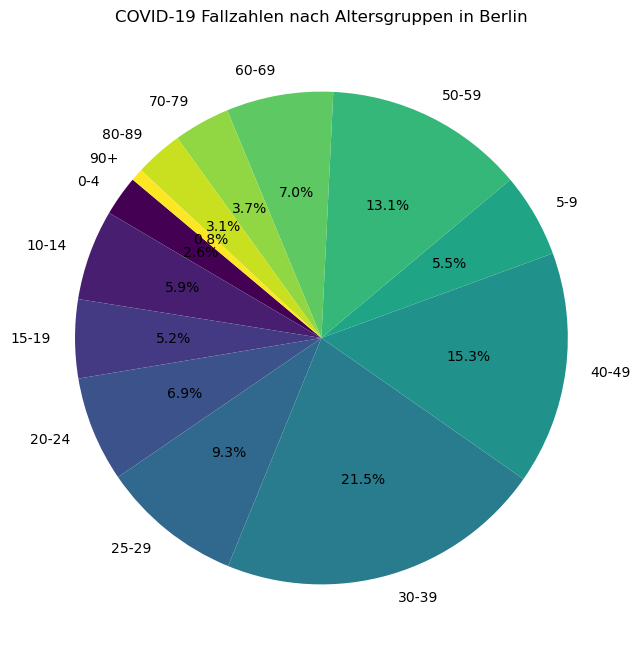

In [12]:
#Web scraping welche altergruppe ist am meisten erkrankt
# URL der Seite mit der Tabelle
url = "https://www.berlin.de/lageso/gesundheit/infektionskrankheiten/corona/tabelle-altersgruppen-gesamtuebersicht/"


response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table")
df = pd.read_html(StringIO(str(table)))[0]
print(df)

df.dropna(how='all', inplace=True)  # Entferne leere Zeilen
df.dropna(axis=1, how='all', inplace=True)  # Entferne leere Spalten

df = df[df['Altersgruppe'] != 'unbekannt']

# Spalte entfernen mit leere zeilen und zahl in int 
df['Fallzahl'] = pd.to_numeric(df['Fallzahl'], errors='coerce')

# Entfern Zeilen mit NaN-Werten
df = df.dropna(subset=['Fallzahl'])

# Fallzahlen nach Altersgruppe summieren
altersgruppen_sum = df.groupby('Altersgruppe')['Fallzahl'].sum()

# Altersgruppe mit den meisten Fällen
max_altersgruppe = altersgruppen_sum.idxmax()  #welche am höchstens ist 
max_faelle = altersgruppen_sum.max()  #wieviel das höchste beträgt


# Kreisdiagramm erstellen
plt.figure(figsize=(10, 8))
altersgruppen_sum.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis') #automatisch in % umwandeln
plt.title('COVID-19 Fallzahlen nach Altersgruppen in Berlin')
plt.ylabel('')
plt.show()


           Datum   Fallzahl  Neue Fälle  Todesfälle  7-Tage-Inzidenz  \
0     25.06.2024        NaN         NaN         NaN             31.0   
1     24.06.2024  1460860.0       118.0      6217.0             20.0   
2     23.06.2024  1460742.0         NaN      6196.0             20.0   
3     22.06.2024  1460742.0         NaN      6196.0             20.0   
4     21.06.2024  1460742.0         NaN      6196.0             17.0   
...          ...        ...         ...         ...              ...   
1580  19.03.2020      688.0       169.0         NaN            125.0   
1581  18.03.2020      519.0       136.0         NaN             97.0   
1582  17.03.2020      383.0        51.0         NaN             81.0   
1583  16.03.2020      332.0       332.0         NaN             70.0   
1584         NaN        NaN         NaN         NaN              NaN   

      relative Veränderung der 7-Tage-Inzidenz  \
0                                          NaN   
1                                  

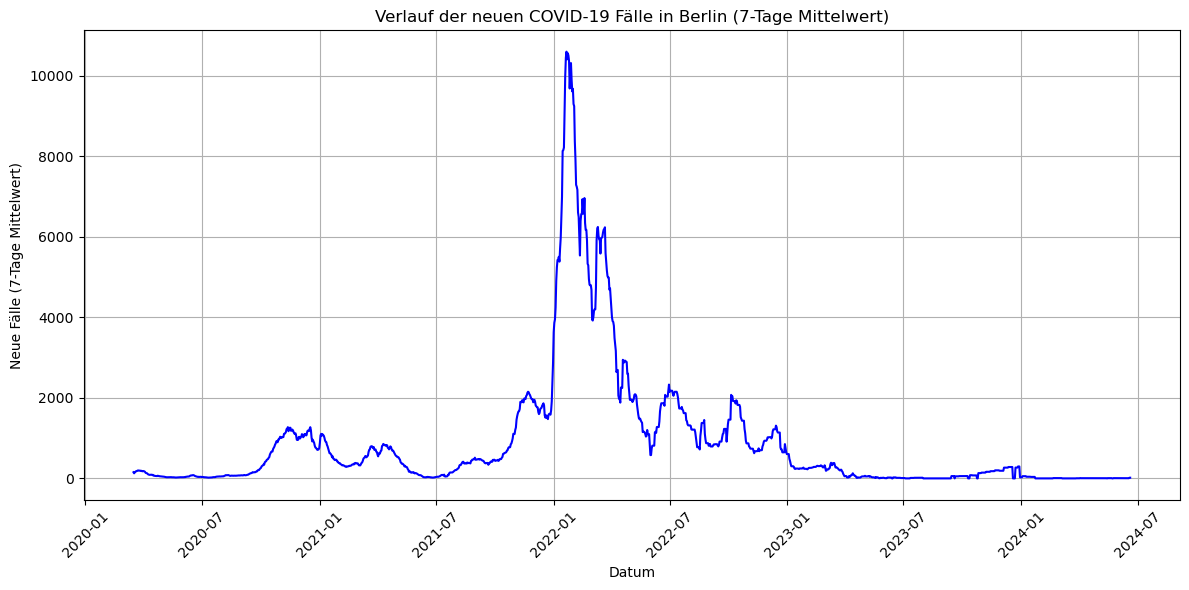

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import matplotlib.pyplot as plt

# URL der Seite mit der Tabelle
url = "https://www.berlin.de/lageso/gesundheit/infektionskrankheiten/corona/tabelle-indikatoren-gesamtuebersicht/"

# Tabelle scrapen und in einen DataFrame umwandeln
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table")
df = pd.read_html(StringIO(str(table)))[0]
print(df)

# Leere Zeilen/Spalten löschen
df.dropna(how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Konvertiere die Spalte 'Datum' zu einem datetime-Objekt
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')

# Setze das Datum als Index
df.set_index('Datum', inplace=True)

# Neue fälle in int 
df['Neue Fälle'] = pd.to_numeric(df['Neue Fälle'], errors='coerce').fillna(0)

# Berechne 7-Tage-Mittelwert
df['Neue Fälle (7-Tage Mittelwert)'] = df['Neue Fälle'].rolling(window=7).mean()

# Verlauf der Pandemie als Liniendiagramm
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Neue Fälle (7-Tage Mittelwert)'], linestyle='-', color='b')
plt.title('Verlauf der neuen COVID-19 Fälle in Berlin (7-Tage Mittelwert)')
plt.xlabel('Datum')
plt.ylabel('Neue Fälle (7-Tage Mittelwert)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


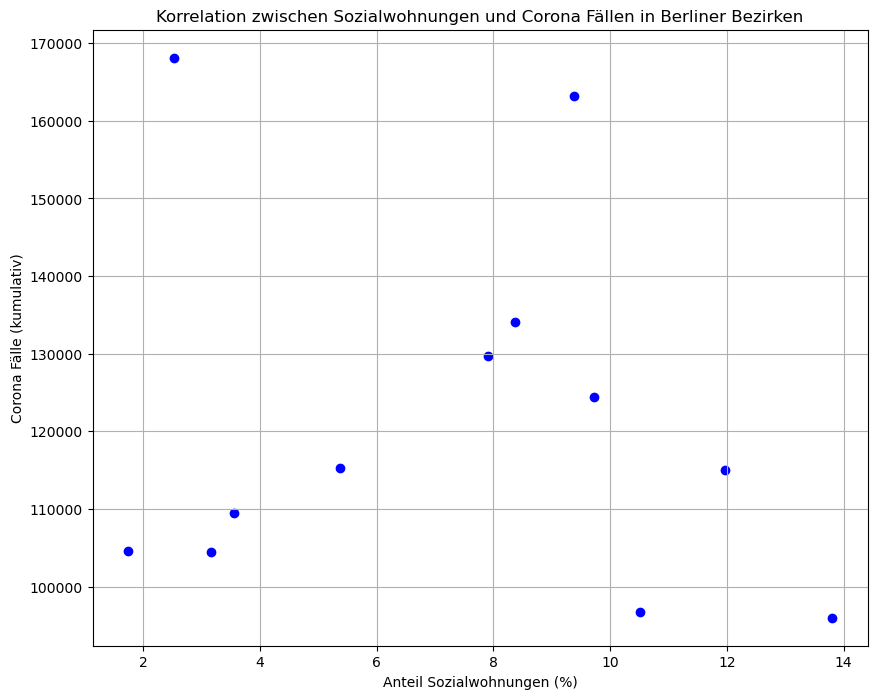

                        Anteil Sozialwohnungen  Corona Fälle
Anteil Sozialwohnungen                1.000000     -0.157873
Corona Fälle                         -0.157873      1.000000


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import matplotlib.pyplot as plt

# Schritt 1: Einlesen der CSV-Datei (Sozialwohnungen Daten)
file_path = 'FIS-Broker-Complete.csv'
data = pd.read_csv(file_path)

# Filter die notwendigen Spalten und Bezirke
columns_of_interest = ['Prognoseraum', 'Anteil Sozialwohnungen']
data_filtered = data[columns_of_interest].copy()

# Konvertiere 'Anteil Sozialwohnungen' in numerischen Wert und behandle Fehler
data_filtered['Anteil Sozialwohnungen'] = pd.to_numeric(data_filtered['Anteil Sozialwohnungen'], errors='coerce')

# Schritt 2: Web Scraping der Corona-Zahlen
url = "https://www.berlin.de/lageso/gesundheit/infektionskrankheiten/corona/tabelle-bezirke/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table")
corona_df = pd.read_html(StringIO(str(table)))[0]

# Daten bereinigen
corona_df.dropna(how='all', inplace=True)
corona_df.dropna(axis=1, how='all', inplace=True)
corona_df = corona_df[corona_df['Bezirk'] != 'Berlin']
corona_df['Fallzahl (kumulativ)'] = corona_df['Fallzahl (kumulativ)'].str.replace('.', '').astype(int)
corona_df.set_index('Bezirk', inplace=True)

# Schritt 3: Aggregation und Korrelation der Daten
district_mapping = {
    "Charlottenburg-Wilmersdorf": ["CW 1", "CW 2", "CW 3", "CW 4", "CW 5", "CW 6"],
    "Friedrichshain-Kreuzberg": ["Friedrichshain West", "Friedrichshain Ost", "Kreuzberg-Nord", "Kreuzberg Süd", "Kreuzberg Ost"],
    "Lichtenberg": ["Lichtenberg Nord", "Lichtenberg Süd", "Lichtenberg Mitte", "Hohenschönhausen Nord", "Hohenschönhausen Süd"],
    "Marzahn-Hellersdorf": ["Marzahn", "Hellersdorf", "Biesdorf", "Kaulsdorf/Mahlsdorf"],
    "Mitte": ["Zentrum", "Moabit", "Gesundbrunnen", "Wedding"],
    "Neukölln": ["Neukölln", "Gropiusstadt", "Britz/Buckow"],
    "Pankow": ["Buch", "Nördliches Pankow", "Nördliches Weißensee", "Südliches Pankow", "Nördlicher Prenzlauer Berg", "Südlicher Prenzlauer Berg", "Südliches Weißensee"],
    "Reinickendorf": ["Reinickendorf-Ost", "Tegel", "Heiligensee-Konradshöhe", "Frohnau-Hermsdorf", "Waidmannslust"],
    "Spandau": ["SPA 1", "SPA 2", "SPA 3", "SPA 4"],
    "Steglitz-Zehlendorf": ["Region A", "Region B", "Region C", "Region D", "Lichterfelde"],
    "Tempelhof-Schöneberg": ["Schöneberg-Nord", "Schöneberg Süd", "Tempelhof", "Lichtenrade", "Mariendorf", "Marienfelde"],
    "Treptow-Köpenick": ["Treptow-Köpenick 1", "Treptow-Köpenick 2", "Treptow-Köpenick 3", "Treptow-Köpenick 4", "Treptow-Köpenick 5"]
}

districts_data = []

for district, names in district_mapping.items():
    social_housing_share = data_filtered[data_filtered['Prognoseraum'].isin(names)]['Anteil Sozialwohnungen'].mean()
    corona_cases = corona_df.loc[district, 'Fallzahl (kumulativ)'] if district in corona_df.index else None
    districts_data.append({
        'Bezirk': district,
        'Anteil Sozialwohnungen': social_housing_share,
        'Corona Fälle': corona_cases
    })

# In DataFrame umwandeln
districts_df = pd.DataFrame(districts_data)

# Korrelation zwischen Sozialwohnungen und Corona-Fällen
correlation = districts_df[['Anteil Sozialwohnungen', 'Corona Fälle']].corr()

# Visualisierung der Korrelation
plt.figure(figsize=(10, 8))
plt.scatter(districts_df['Anteil Sozialwohnungen'], districts_df['Corona Fälle'], c='blue')
plt.xlabel('Anteil Sozialwohnungen (%)')
plt.ylabel('Corona Fälle (kumulativ)')
plt.title('Korrelation zwischen Sozialwohnungen und Corona Fällen in Berliner Bezirken')
plt.grid(True)
plt.show()

print(correlation)
